In [2]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_and_prepare_data import FrankeFunction, create_design_matrix
from model_selection import R2, MSE, cross_validation, bootstrap

# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [115]:
# Choose parameters for model
pol_degree = 10
data_size = 300
error_std = 0.1

In [116]:
np.random.seed(5)
# Make data
x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(loc=0, scale=error_std)

In [117]:
mse_bs_train = []
mse_bs_test = []

for i in range(1, pol_degree + 1):
    X = create_design_matrix(x, y, i)
    mse_test, mse_sample = bootstrap(X, z, 5, sample_size=int(0.75*len(z)))
    mse_bs_train.append(mse_sample)
    mse_bs_test.append(mse_test)

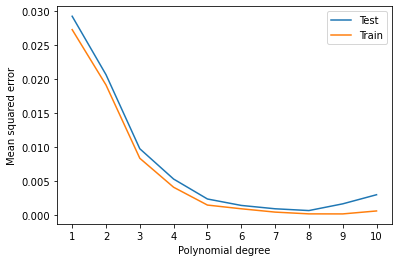

In [118]:
plot_mse_per_poldegree(mse_bs_train, mse_bs_test, pol_degree)

In [119]:
mse_bs_train = []
mse_bs_test = []

for i in range(1, pol_degree + 1):
    X = create_design_matrix(x, y, i)
    mse_test, mse_sample = bootstrap(X, z, 5, sample_size=int(0.6*len(z)))
    mse_bs_train.append(mse_sample)
    mse_bs_test.append(mse_test)

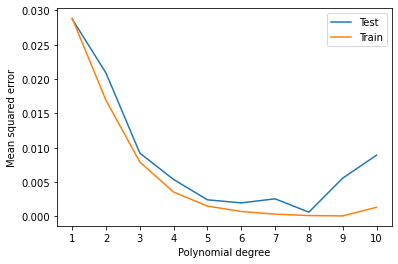

In [120]:
plot_mse_per_poldegree(mse_bs_train, mse_bs_test, pol_degree)